In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_salary = pd.read_csv("salary.csv")
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df_salary.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [4]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# checking the null values without visualization.
df_salary.isnull().sum()

# there are no null values present.

YearsExperience    0
Salary             0
dtype: int64

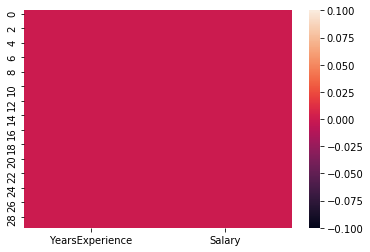

In [7]:
# Let's check the null vaues using heatmap.

sns.heatmap(df_salary.isnull())
plt.show()

In [8]:
# Let's check the skewness.

df_salary.skew()


YearsExperience    0.37956
Salary             0.35412
dtype: float64

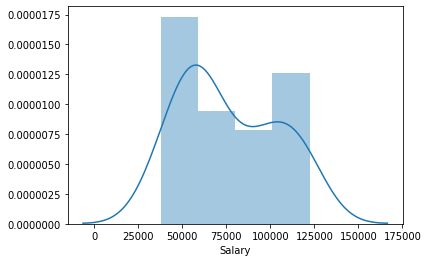

In [9]:
sns.distplot(df_salary['Salary'])

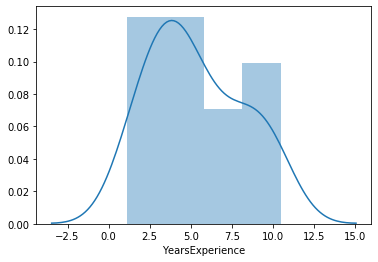

In [10]:
sns.distplot(df_salary['YearsExperience'])

In [11]:
# Let's check the correlation

df_salary_cor = df_salary.corr()
df_salary_cor

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


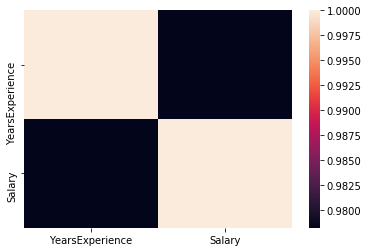

In [12]:
sns.heatmap(df_salary_cor)

Text(0, 0.5, 'Salary')

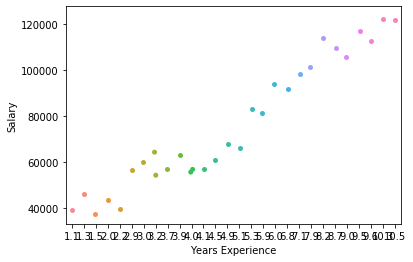

In [13]:
#Scatter Plot to find linear relationship

sns.stripplot(df_salary['YearsExperience'], df_salary['Salary'], data= df_salary)
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [14]:
df_salary.shape

(30, 2)

In [15]:
df_salary.columns

Index(['YearsExperience', 'Salary'], dtype='object')

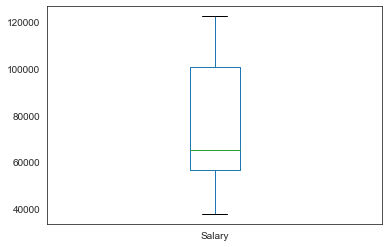

In [16]:
# let's check the outliers through visualisation for particular variables.

sns.set_style('white')
df_salary['Salary'].plot.box()

# From the below it shows that the outlers are present in this variable.


In [17]:
# Let's now check the outliers.

from scipy.stats import zscore
z = np.abs(zscore(df_salary))
z

array([[1.51005294, 1.36011263],
       [1.43837321, 1.10552744],
       [1.36669348, 1.419919  ],
       [1.18749416, 1.20495739],
       [1.11581443, 1.33978143],
       [0.86493538, 0.71830716],
       [0.82909552, 0.58815781],
       [0.75741579, 0.79981746],
       [0.75741579, 0.42881019],
       [0.57821647, 0.69801306],
       [0.50653674, 0.47433279],
       [0.47069688, 0.74976858],
       [0.47069688, 0.70662043],
       [0.43485702, 0.70201994],
       [0.29149756, 0.55250402],
       [0.1481381 , 0.29921736],
       [0.07645838, 0.37004264],
       [0.00477865, 0.26285865],
       [0.21026054, 0.19885989],
       [0.2461004 , 0.66547573],
       [0.53281931, 0.58377993],
       [0.6403389 , 0.82623317],
       [0.92705781, 0.93861127],
       [1.03457741, 1.40274136],
       [1.21377673, 1.24020308],
       [1.32129632, 1.09740238],
       [1.50049564, 1.51986835],
       [1.5363355 , 1.3590738 ],
       [1.78721455, 1.72102849],
       [1.85889428, 1.70177321]])

In [18]:
df_salary_final = df_salary.loc[(z<3).all(axis=1)]

In [19]:
df_salary_final.shape

(30, 2)

In [20]:
df_salary.shape

(30, 2)

In [21]:
# this shows that are no outliers present .

In [22]:
#Lets seprate the input and output variable

x = df_salary[['YearsExperience']]
y = df_salary['Salary']


In [23]:
# Scaling down using Standardscaler.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [25]:
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 score corresponding to random state: ", r_state,"is: ", r2_scr)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
        
print()
print()
print("max r2 score corresponding to ",final_r_state," is : ",max_r_score)

r2 score corresponding to random state:  42 is:  0.9024461774180499
r2 score corresponding to random state:  43 is:  0.8688045158887868
r2 score corresponding to random state:  44 is:  0.9349511170439279
r2 score corresponding to random state:  45 is:  0.9250487875802144
r2 score corresponding to random state:  46 is:  0.9789129767378081
r2 score corresponding to random state:  47 is:  0.98399193890564
r2 score corresponding to random state:  48 is:  0.980277279178695
r2 score corresponding to random state:  49 is:  0.9497670285223544
r2 score corresponding to random state:  50 is:  0.882467963516984
r2 score corresponding to random state:  51 is:  0.9608624689052039
r2 score corresponding to random state:  52 is:  0.9743646706957548
r2 score corresponding to random state:  53 is:  0.9501154883629507
r2 score corresponding to random state:  54 is:  0.949272996884066
r2 score corresponding to random state:  55 is:  0.8924137091604103
r2 score corresponding to random state:  56 is:  0.98

In [26]:
# Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5, scoring = "r2").mean()

-0.0533642768450965

In [27]:
# Thus creating the final model.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

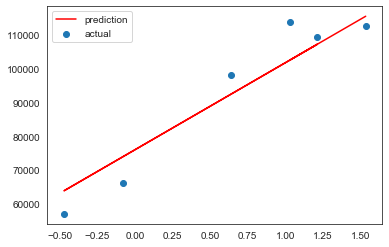

In [28]:
# plot our prediction value
plt.scatter(x_test, y_test, label='actual')
plt.plot(x_test,y_pred, label='prediction', color = 'red' )
plt.legend();

In [29]:
# Lets evaluate RMSE and r2 score using sklearn library
import numpy as np
print("r2 score is : ",r2_score(y_test, y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is :  0.9102354571044845
RMSE is :  6857.085123604398


In [30]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(lr, 'lr_salary.pkl')

['lr_salary.pkl']